In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
%matplotlib inline

%run "../datasets/parse.ipynb"
train_df = parse_train("../")

In [14]:
train_df.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)', 'dt', 'city_name', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all',
       'weather_description'],
      dtype='object')

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    2256 non-null   object 
 6   dt                       2256 non-null   int64  
 7   city_name                2256 non-null   object 
 8   temp                     2256 non-null   float64
 9   feels_like               2256 non-null   float64
 10  temp_min                 2256 non-null   float64
 11  temp_max                 2256 non-null   float64
 12  pressure                 2256 non-null   int64  
 13  sea_level                2256 non-null   object 
 14  grnd_level              

In [12]:
train_df.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2022-01-01,0,0.0,0.486,0.0,None,1640995200,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.15,NaN,97,overcast clouds
1,2022-01-01,1,0.0,0.429,0.0,None,1640998800,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.14,NaN,58,broken clouds
2,2022-01-01,2,0.0,0.463,0.0,None,1641002400,local,16.59,16.03,15.67,16.72,1024,NaN,NaN,66,3.12,NaN,23,few clouds
3,2022-01-01,3,0.0,0.545,0.0,None,1641006000,local,13.59,12.75,11.61,16.16,1023,NaN,NaN,67,3.08,NaN,22,few clouds
4,2022-01-01,4,0.0,0.439,0.0,None,1641009600,local,14.97,14.27,14.72,15.66,1023,NaN,NaN,67,3.12,NaN,15,few clouds


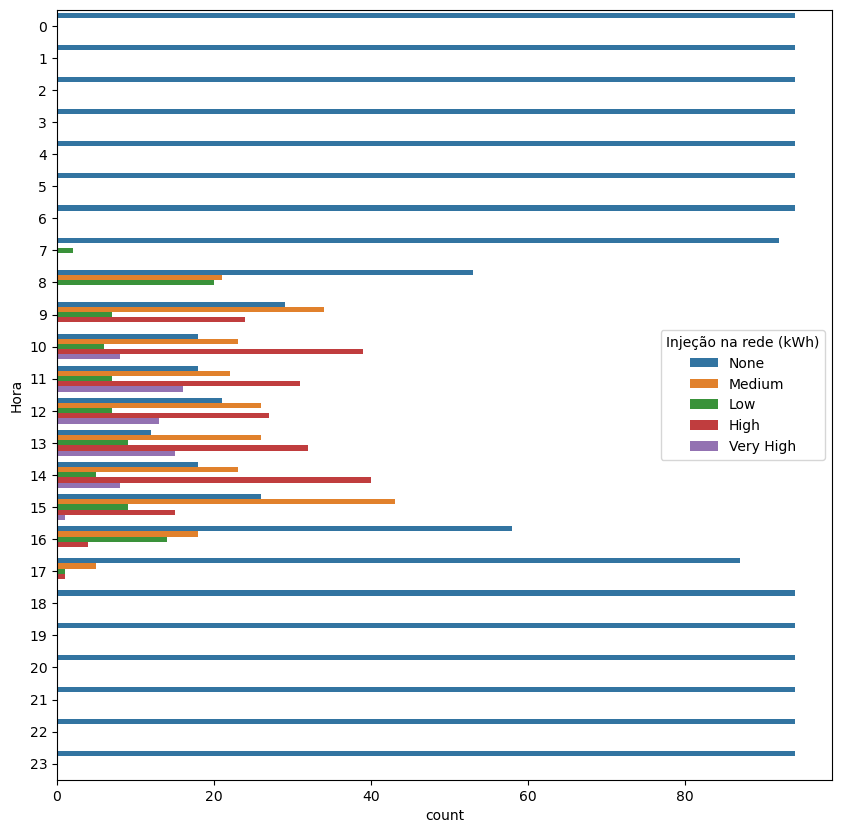

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.countplot(y='Hora', data=train_df, hue='Injeção na rede (kWh)')

plt.show()

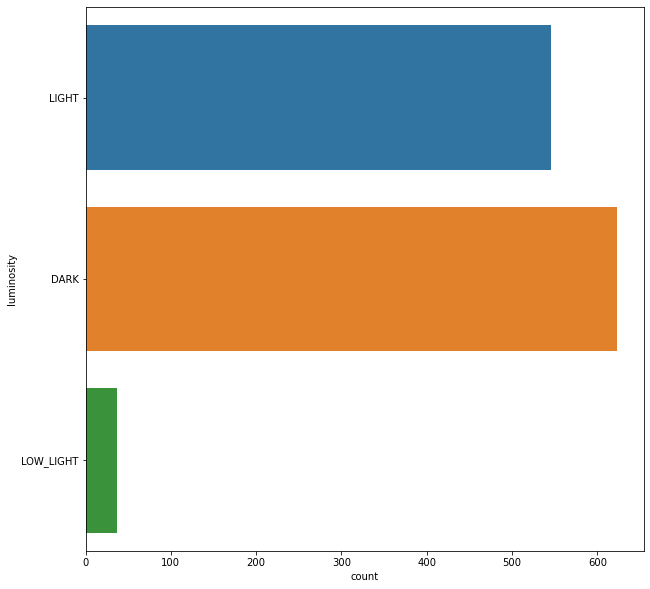

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.countplot(y='luminosity', data=test_df)

plt.show()

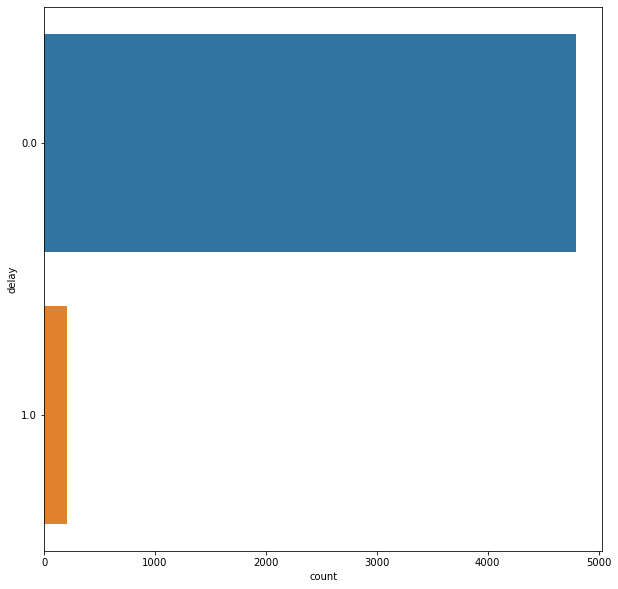

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

fig, ax = plt.subplots(figsize=(10, 10))

train_df_copy = train_df.copy()

est = KBinsDiscretizer(n_bins=2, strategy='kmeans', encode='ordinal')
train_df_copy['delay'] = \
    est.fit_transform(train_df_copy[['delay_in_seconds']])

#sns.countplot(y='delay', data=train_df_copy, hue='incidents')
sns.countplot(y='delay', data=train_df_copy)

plt.show()

In [ ]:
def convert_record_date(df: pd.DataFrame) -> pd.DataFrame:
    df_ = df.copy()

    record_date = pd.DatetimeIndex(df_['record_date'])

    df_.drop('record_date', axis=1, inplace=True)

    df_['hour'] = record_date.hour
    df_['day'] = record_date.day
    df_['month'] = record_date.month
    df_['weekday'] = record_date.weekday
    df_['hour'] = record_date.hour

    return df_

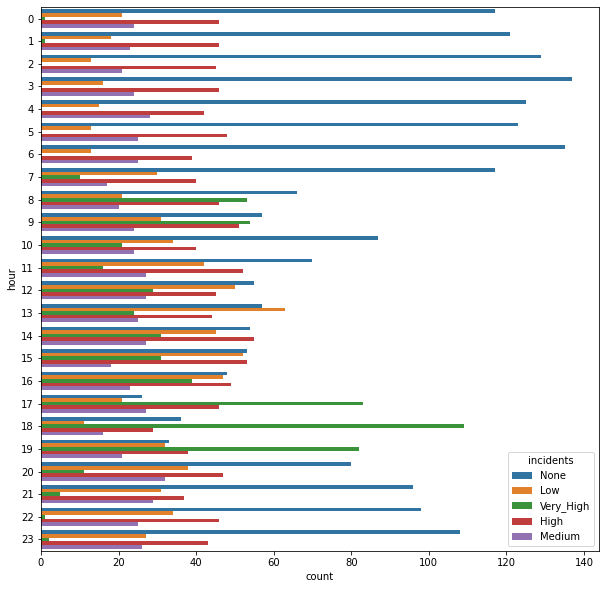

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

train_df_copy = convert_record_date(train_df.copy())

#est = KBinsDiscretizer(n_bins=3, strategy='quantile', encode='ordinal')
#train_df_copy['hour'] = est.fit_transform(train_df_copy[['hour']])

sns.countplot(y='hour', data=train_df_copy, hue='incidents')

plt.show()

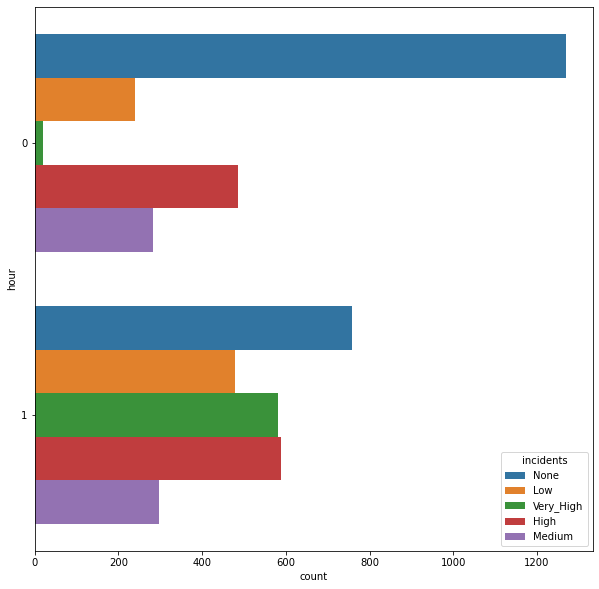

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

train_df_copy = convert_record_date(train_df.copy())


def hour_of_the_day(hour):
    if hour >= 20 or 0 <= hour <= 6:
        return 0
    elif 7 <= hour <= 19:
        return 1

    return 2


train_df_copy["hour"] = train_df_copy["hour"].apply(hour_of_the_day)

sns.countplot(y='hour', data=train_df_copy, hue='incidents')

plt.show()

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain'],
      dtype='object')


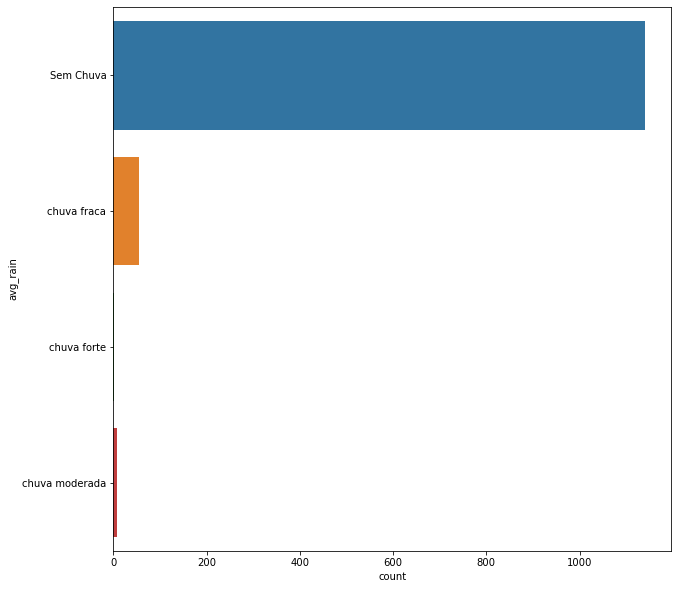

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

train_df_copy = test_df.copy()

print(train_df_copy.columns)

sns.countplot(y='avg_rain', data=train_df_copy)

plt.show()